# Série 2 - Résolution d'équation non linéaire

Il est fréquent d'avoir besoin d'obtenir une solution numérique approchée à une équation non linéaire qui ne dispose de solution analytique simple. Dans ce cas, plusieurs technique existe comme vu en cours.

Le but de cette série d'exercice est de vous entraîner à l'utilisation de ces méthodes et de mieux comprendre leur forces et limitations.

**Exercice 1 - Préliminaire**

Soit l'équation d'état du $CO_2$

$$\left[ p + a \left( \frac{N}{V} \right)^2 \right] 
  \left( V - Nb \right) = k N T $$
  
avec :
- $k = 1.3806503 \cdot 10^{-23}$  la Constante de Boltzmann en Joule/Kelvin
- $a = 0.401$ Pascal m$^6$
- $b = 4.27\cdot 10^{-5}$  m$^3$

Le but est d'estimer le volume de $CO_2$ gazeux correspondant aux conditions suivantes :
- $N = 1000$ molécules
- $T = 300$  Kelvins
- $p = 3.5\cdot 10^{7}$  Pascals

Pour cela vous devez :
1. Ecrire une fonction en python qui prend en entrée le volume $V$ et renvoit  en sortie : 
$$
\left[ p + a \left( \frac{N}{V} \right)^2 \right] 
  \left( V - Nb \right) - k N T
$$
Cette fonction sera égale à zéro quand on lui donne le volume recherché en entrée.
2. Faire un graphe de cette fonction pour une gamme de valeur de $V$ allant de 0.03 à 0.1 m$^3$.
3. Vérifier que la fonction passe bien par zéro dans l'intervalle 0.03 à 0.1

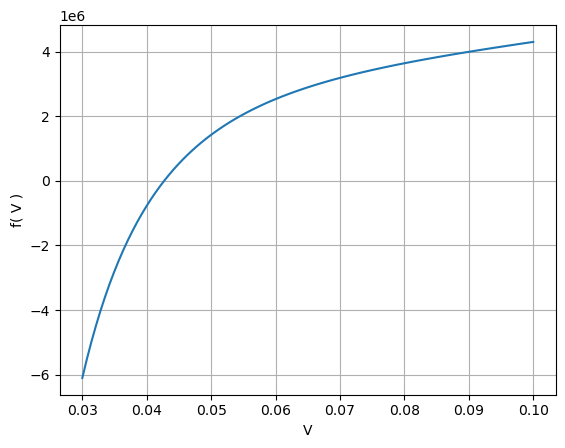

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Définition des constantes de l'équation d'état du CO2
k = 1.3806503e-23 # Constante de Boltzmann en Joule/Kelvin
a = 0.401 #Pascal m^6
b = 4.27e-5 # m^3

# Définition des paramètres pour l'exemple
N = 1000 # Nb Molécules
T = 300 # Kelvin
p = 3.5e7 # Pascal

# La fonction à résoudre
def f(V):
    return ( p + a * (N / V)**2 ) * ( V - N * b ) - k * N *T

# Graphe
V = np.linspace(0.03,0.1,100)
plt.plot(V,f(V))
plt.grid('on')
plt.xlabel('V')
plt.ylabel('f( V )')

# Sauvegarde du graphe dans un fichier png
plt.savefig('zero_co2.png')
plt.show()

On constate bien que la fonction passe de -6 à +4, il y a donc un zéro dans l'intervalle [0.03, 0.1]. Graphiquement, on observe qu'elle vaut zéro pour un volume de l'ordre de 0.043.

**Exercice 2 - Utilisation de fsolve**

Pour commencer, et comme c'est la solution que l'on utilisera le plus souvent en pratique, employez la fonction `fsolve` du module `scipy.optimize` pour calculer le volume de gaz. Combien trouvez-vous ?

Utilisez la cellule ci-dessous pour écrire les 2 lignes de codes nécessaires.

In [13]:
from scipy.optimize import fsolve
V = fsolve(f,0.04)
print('Le volume de CO2 est de:',V)

Le volume de CO2 est de: [0.0427]


**Exercice 3 - Bisection**

Ecrire un code python pour implémenter la méthode de bisection pour trouver la valeur de $V$. Afin de pouvoir l'appliquer ensuite pour différents cas, écrivez l'algorithme dans une fonction. La cellule ci-dessous donne les spécifications (input, output) de cette fonction. 

Appliquer la fonction ainsi définie au problème de calcul du volume de CO2. Est-ce que le résultat est en accord avec celui que vous avez déja obtenu ?

Faites quelques essais pour voir comment la solution (volume V et nombre d'itération) dépend de l'erreur choisie. 
Combien d'itérations faut-il pour obtenir un résultat avec une tolérance de 1e-20 ?


In [14]:
# Version simple de l'algorithme sans tests ni messages détaillées
# L'avantage de cette version est sa lisibilité

def bisection(f, a, b, eps = 1e-5, kmax = 1000):
    """Résolution d'une équation non linéaire par méthode de bisection 
    """
    k = 0  
    while True:           
        x = ( a + b )/2
        y = f(x)              
        if y == 0:
            print("convergence : solution exacte atteinte")
            return x, k                          
        if f(a) * f(x) < 0:
            b = x
        else:
            a = x            
        k += 1        
        if np.abs(a-b) <= eps:
            print("convergence : erreur inférieure à la tolérance")
            return x, k        
        if k > kmax:
            print("convergence : nombre d'itération maximum atteind")
            return x, k

In [16]:
# version plus longue avec messages détaillées, vérification des paramètres d'entrée et
# quelques modifications pour ne pas répéter les appels à f et optimiser le temps calcul

def bisection(f, a, b, eps = 1e-5, kmax = 1000, verbose = False):
    """Résolution d'une équation non linéaire par méthode de bisection 
    
    Parametres
    ----------
    f : fonction appelable par python ``f(x)`` 
        La fonction à résoudre, on cherche x, tel que f(x)=0
    a, b : float
        Valeur minimum et maximum de x entre lesquelles on cherche une solution    
    eps : float
        Valeur de l'erreur acceptable sur la solution
    kmax : int
        Nombre maximum d'itérations
        
    Retourne
    --------
    x : float
        Valeur x telle que f(x)=0
    k : int
        Le nombre d'itérations qui ont été nécessaire pour trouver x
    
    """
    
    if a >= b:
        print("a doit être strictement inférieur à b")
        return np.NaN, 0
    
    ya = f(a)
    yb = f(b)  

    if ya * yb >= 0:
        print("a et b n'encadre pas un zéro de f")
        return np.NaN, 0
 
    k = 0
    
    while True:           
        x = ( a + b )/2.0
        y = f(x)       
        
        if y == 0:
            if verbose:
                print(" convergence reached: f(x)=0")
            return x, k      
            
        if verbose:
            print("iteration:",k)
            print("  a:", a, "f(a):", ya)        
            print("  b:", b, "f(b):", yb)
            print(" => x:", x, "f(x):", y)            
            
        if ya * y < 0:
            b = x
            yb = f(b)
        else:
            a = x
            ya = f(a)
        
        k += 1
        
        if np.abs(a-b) <= eps:
            if verbose:
                print(" convergence : erreur inférieure à la tolérance")
            return x, k
        
        if k > kmax:
            if verbose:
                print(" convergence : nombre d'itération maximum atteind")
            return x, k

In [20]:
bisection(f,0.03,1,1e-5,verbose=True)

iteration: 0
  a: 0.03 f(a): -6103055.555555557
  b: 1 f(b): 33889377.300000004
 => x: 0.515 f(x): 17244581.62880573
iteration: 1
  a: 0.03 f(a): -6103055.555555557
  b: 0.515 f(b): 17244581.62880573
 => x: 0.2725 f(x): 9283970.288696239
iteration: 2
  a: 0.03 f(a): -6103055.555555557
  b: 0.2725 f(b): 9283970.288696239
 => x: 0.15125 f(x): 5702007.461922
iteration: 3
  a: 0.03 f(a): -6103055.555555557
  b: 0.15125 f(b): 5702007.461922
 => x: 0.090625 f(x): 4017345.891795481
iteration: 4
  a: 0.03 f(a): -6103055.555555557
  b: 0.090625 f(b): 4017345.891795481
 => x: 0.0603125 f(x): 2557997.0586458696
iteration: 5
  a: 0.03 f(a): -6103055.555555557
  b: 0.0603125 f(b): 2557997.0586458696
 => x: 0.045156249999999995 f(x): 569006.6446612215
iteration: 6
  a: 0.03 f(a): -6103055.555555557
  b: 0.045156249999999995 f(b): 569006.6446612215
 => x: 0.037578125 f(x): -1633730.1544582949
iteration: 7
  a: 0.037578125 f(a): -1633730.1544582949
  b: 0.045156249999999995 f(b): 569006.6446612215
 =>

(0.04270668029785156, 17)

On constate qu'il faut une tolérance inférieure à 1e-4 pour retrouver la valeur donnée par `fsolve`. Le calcul est rapide même avec une tolérance très faible, par ex 1e-20, les 1000 itérations nécessaires sont calculés en quelques fractions de secondes.

**Exercice 4 - Méthode de Newton**

Comme ci-dessus, on vous demande une fonction pour trouver le zéro de la fonction d'état du CO2 mais cette fois-ci avec la méthode de newton.

Une petite difficulté dans la méthode de Newton est qu'il vous faut la dérivée en chaque point. Pour la calculer, la fonction `derive()` vous est donné ci-dessous.

En combien d'itération obtenez-vous un résultat avec une tolérance de 1e-20 ?

In [34]:
def derive(f,x,dx=1e-5):
    """Calcule la dérivée f'(x) centrée au point x par la méthode des incréments."""
    return ( f( x + dx ) - f( x - dx ) ) / ( 2 * dx )

def newton(f, x0, eps = 1e-5, kmax = 1000, verbose = False):
    """Résolution d'une équation non linéaire par méthode de Newton 
    
    Parametres
    ----------
    f : fonction appelable par python ``f(x)`` 
        La fonction à résoudre, on cherche x, tel que f(x)=0
    a, b : float
        Valeur minimum et maximum de x entre lesquelles on cherche une solution    
    eps : float
        Valeur de l'erreur acceptable sur la solution
    kmax : int
        Nombre maximum d'itérations
        
    Retourne
    --------
    x : float
        Valeur x telle que f(x)=0
    k : int
        Le nombre d'itérations qui ont été nécessaire pour trouver x
    
    """
    
    tolerance = eps**2 # Pour éviter de calculer le carré à chaque itération
    if verbose:
        print("valeur initiale:")
        print("  x:",x0,"f(x):",f(x0))

    for k in range(1,kmax):
        step = f(x0)/derive(f,x0) 
        x1 = x0 - step    
        if verbose:
            print("iteration:",k)
            print("  x:",x1,"f(x):",f(x1))  
        if step**2 < tolerance:
            return x1, k      
        x0 = x1
    
    return x1    
        
newton(f, 0.03, 1e-20)

0.352288456460873

**Exercice 5 - Comparaison des méthodes**

Nous cherchons maintenant le zéro de la fonction :

$$f(x) = \sin(2x)-1+x$$

Le bloc ci-dessous vous donne la définition de la fonction et le graphe dans l'intervalle $[-3,3]$.

On vous demande de comparer les résultats obtenus par :
- votre fonction de bisection en partant de l'intervale [-3,3] avec une erreur de 1e-10
- votre fonction basée sur la méthode de Newton en partant de $x=2.0$ avec une erreur de 1e-10
- la fonction `fsolve` en partant aussi de $x=2.0$

Qu'observez-vous ?

Essayez la même chose en prenant un point de départ plus proche de la solution.

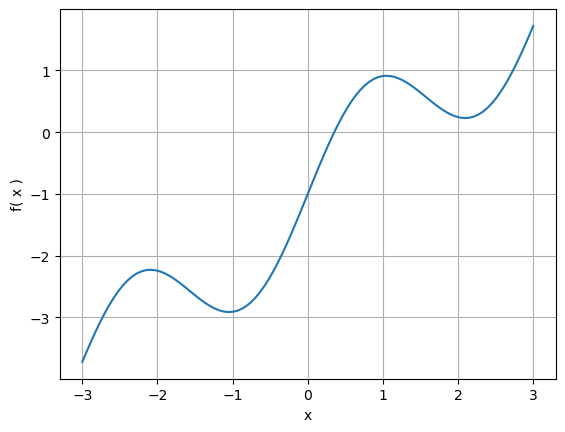

In [42]:
def f(x):
    return  np.sin(2*x) - 1 + x

K = np.linspace(-3,3,100)
plt.plot(K,f(K))
plt.grid('on')
plt.xlabel('x')
plt.ylabel('f( x )')
plt.show()

In [39]:
bisection(f,-3,3,1e-10)

(0.35228845654637553, 36)

In [47]:
newton(f, 2, 1e-10)

/tmp/ipykernel_58793/2324960064.py:34: RuntimeWarning: divide by zero encountered in double_scalars
  step = f(x0)/derive(f,x0)
/tmp/ipykernel_58793/57249500.py:2: RuntimeWarning: invalid value encountered in sin
  return  np.sin(2*x) - 1 + x


nan

In [41]:
fsolve(f, 2)

/home/gehrenard/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([2.09421309])

In [48]:
newton(f, 0.5, 1e-10)

(0.352288456460873, 5)

In [49]:
fsolve(f, 0.5)

array([0.35228846])

On constate que dans ce cas, la méthode de bisection est plus efficace que la méthode de Newton. Elle converge plus vite et semble plus stable. La méthode de Newton converge, mais seulement après 108 itération. Ce n'est pas étonnant car les dérivées s'inverse régulièement et le point de départ est assez loin de la solution recherchée.  La fonction `fsolve` s'arrête carrément sans donner de résultat.

En revanche, si on part d'une meilleure approximation, par exemple $x=0.5$, alors la méthode de Newton converge très vite et fsolve aussi.

Le message a retenir est que ces techniques sont efficaces mais qu'il faut bien les contraindre et vérifier graphiquement vos calculs pour avoir bien confiance dans le résultat.

